# Coordinate descent

## Introduction
Coordinate descent is an optimization algorithm that successively minimizes along coordinate directions to find the minimum of a function. At each iteration, the algorithm determines a coordinate or coordinate block via a coordinate selection rule, then exactly or inexactly minimizes over the corresponding coordinate hyperplane while fixing all other coordinates or coordinate blocks. A line search along the coordinate direction can be performed at the current iterate to determine the appropriate step size. Coordinate descent is applicable in both differentiable and derivative-free contexts.

## Algorithm Process
假设要求解函数的$F(x)=f(x_1,x_2,\ldots ,x_n)$的极小值（驻点，`staionary point`），其中$x_1,x_2, \ldots ,x_n$为参数。算法过程如下，
1. 初始化参数$x^0 = (x_1^0,x_2^0,  \ldots, x_n^0)$
2. 然后固定$x_2^0,  \ldots, x_n^0$,然后更新$x_1^0$的值为$x_1^1$,如下，
$$x_1^1=\underset{x_1}{\rm arg\ \min}\  f(x_1, x_2^0, \ldots, x_n^0)$$
然后依次更新$x_2^0, \ldots, x_n^0$，至此参数由$x^0$变为$x^1$
3.  循环步骤2, 直至收敛 

从上述过程可以看出，从初始值$x^0$开始，在经过数轮迭代后，我们可以得到一个求解的序列，$x^0,x^1, \cdots$，每一步的求解均是通过`line search`得到，所以我们可以得到如下，
$$F(x^0) \geq F(x^1) \geq F(x^2) \geq \ldots $$
从这个序列求解中我们可以看出，当函数值$F(x)$在迭代没有下降时，我们可以推测此时的解给一个极小值(`stationary point`)

## Example

函数$F(x_1, x_2) = 5x_1^2-6x_1x_2+5x_2^2, x_1, x_2 \in (-1.5, 1.5)$，随机给定初始值，求函数$F(x)$的一个驻点

In [1]:
def coodinate_descent(func, initial_state, num_round, eps, line_search_range):
    """
    minimize locally function from initial state on condition that num_round & eps
    ------
    param:
        func: function, lambda expression
        inital_state: list, inital value
        num_round: num of iterations
        eps: minimum error
        line_search_range: line search range
    ------
    return:
        list of solutions
    """
    import numpy as np
    import copy
    
    LINE_SEARCH_STEP = 0.01
    
    t = 0
    gap = 100
    solution_round = [initial_state]
    while t < num_round and gap > eps:
        # print(solution_round)
        for index, val in enumerate(initial_state):
            # do line search
            initial_state = copy.copy(initial_state)
            min_function_val = before_function_value = func(*initial_state)
            for l_s in np.arange(*line_search_range, LINE_SEARCH_STEP):
                initial_state[index] = l_s
                iterate_function_val = func(*initial_state)
                if iterate_function_val >= min_function_val:
                    initial_state[index] = val  # back 
                else:  # update minimum fuction value and point
                    min_function_val = iterate_function_val
                    val = l_s 
            
            solution_round.append(initial_state)
        # print(min_function_val)
        gap = abs(min_function_val - before_function_value)
        t += 1
        # print(gap)
        solution_round.append(initial_state)
    return solution_round, min_function_val

f = lambda x1, x2: 5*x1*x1-6*x1*x2+5*x2*x2
solutions, local_min = coodinate_descent(f, [-0.5, -1], 100, 0.0001, [-1.5, 1.5])
# 优化过程图形化展示如下所示

Text(0.4, 0.6, 'stationary point')

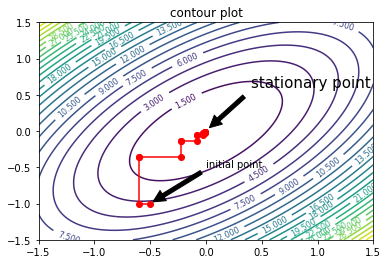

In [65]:
import matplotlib.pyplot as plt

x=np.linspace(-1.5, 1.5, 300)
y=np.linspace(-1.5, 1.5, 300)
X,Y=np.meshgrid(x,y)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, f(X, Y), 30)
ax.clabel(CS, inline=2, fontsize=8)
ax.set_title('contour plot')

xx = [i[0] for i in solutions]
yy = [i[1] for i in solutions]

ax.plot(xx, yy, 'r-o')

ax.annotate("initial point", xy=(xx[0], yy[0]), xytext=(0, -0.5),
            arrowprops=dict(facecolor='black', shrink=0.05), size=10)

ax.annotate("stationary point", xy=(xx[-1], yy[-1]), xytext=(0.4, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.1), size=15)


## Limitations

- non-smooth multivariable   
coordinate descent iteration may get stuck at a non-stationary point if the level curves of a function are not smooth.

- difficulty in parallelism
Since the nature of Coordinate Descent is to cycle through the directions and minimize the objective function with respect to each coordinate direction, Coordinate Descent is not an obvious candidate for massive parallelism.

## References

[1] [CoordinateDescent Wiki](https://en.wikipedia.org/wiki/Coordinate_descent)